# Characterize potential AGN with structure functions

Author: Midori Rollins & Melissa Graham

Can we use structure functions to characterize the potential AGN identified among the DDF candidates?


This paper is one that contains a description of the structure function.

https://iopscience.iop.org/article/10.1088/0004-637X/696/2/1241

$SF(\tau) = \sqrt{\langle | m_{t}-m_{t-\tau}|^{2} \rangle - \langle \sigma^{2} \rangle }$

* t = time
* $m_{t}$- $m_{t-\tau}$ = difference in apparent magnitude of a candidate at two different times of observation
* $\tau$ = time lag
* $\sigma$ = noise


**It is very important to remember that our DECam DDF light curves are difference-image light curves, and only when the difference-image flux was POSITIVE.**

Furthermore we do not have measurements of the direct-image light curves and we do not have measurements from the template image.

This is not the way to do things for AGN.

However, for structure functions, you want delta-mag vs delta-time so maybe this could still be useful?

## Set up and load data

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

In [2]:
fnm = '../all_nightly_epochs_files/candidate_lightcurves.dat'
candLC_field = np.loadtxt(fnm, dtype='str', usecols=(0))
candLC_candid = np.loadtxt(fnm, dtype='str', usecols=(1))
candLC_caldate = np.loadtxt(fnm, dtype='str', usecols=(2))
candLC_mjd = np.loadtxt(fnm, dtype='float', usecols=(3))
candLC_filter = np.loadtxt(fnm, dtype='str', usecols=(4))
candLC_Nobj = np.loadtxt(fnm, dtype='int', usecols=(5))
candLC_mag = np.loadtxt(fnm, dtype='float', usecols=(6))
candLC_mage = np.loadtxt(fnm, dtype='float', usecols=(7))
candLC_mrb = np.loadtxt(fnm, dtype='float', usecols=(8))
candLC_lef = np.loadtxt(fnm, dtype='float', usecols=(9))
del fnm

In [3]:
fnm = 'potential_AGN_list_1.txt'
candidates_of_interest = np.loadtxt(fnm, dtype='str', usecols=(0))
del fnm
print(candidates_of_interest)

['DC21bea' 'DC21bg' 'DC21by' 'DC21gkn' 'DC21ieh' 'DC21ig' 'DC21jee'
 'DC21kmlo' 'DC21kqpe' 'DC21pit' 'DC21psr' 'DC21ttg' 'DC21vey' 'DC21xmt'
 'DC21yn']


## Choose one candidate and explore its SF

In [4]:
# use_cand = 'DC21kqpe'
use_cand = 'DC21bckq'
use_filt = 'i'

### plot the light curve

In [5]:
cx = np.where((candLC_candid == use_cand) & (candLC_filter == use_filt))[0]
mjd = candLC_mjd[cx]
mag = candLC_mag[cx]

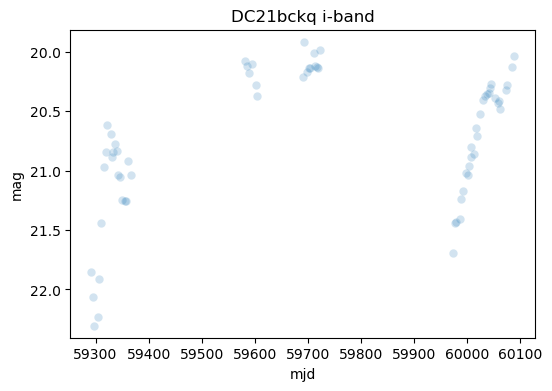

In [6]:
fig = plt.figure(figsize=(6, 4))
plt.plot(mjd, mag, 'o', alpha=0.2, mew=0)
plt.ylim([np.max(mag)+0.1, np.min(mag)-0.1])
plt.xlabel('mjd')
plt.ylabel('mag')
plt.title(use_cand + ' ' + use_filt + '-band')
plt.show()

### calculate the SF

There is a $\sigma$ term in the equation but what would we use for that?

For now just skipped it.

In [7]:
tmp1 = []
tmp2 = []
for i in range(len(mjd)):
    if i < len(mjd)-1:
        for j in range(i+1, len(mjd)):
            tmp1.append(np.abs(mjd[j] - mjd[i]))
            tmp2.append(np.abs(mag[j] - mag[i]))
dt = np.asarray(tmp1, dtype='float')
dm = np.asarray(tmp2, dtype='float')

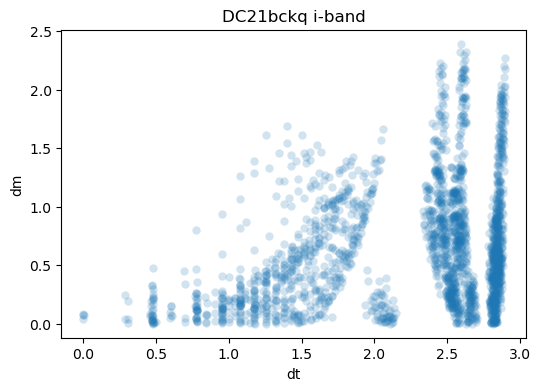

In [8]:
fig = plt.figure(figsize=(6, 4))
plt.plot(np.log10(dt), dm, 'o', alpha=0.2, mew=0)
plt.xlabel('dt')
plt.ylabel('dm')
plt.title(use_cand + ' ' + use_filt + '-band')
plt.show()

## What to do next?

SFs seem to be binned and then plotted, and they also seem to be done for a sample
not for a single object. 

Should we do that?

Or do we not have the right data to pursue structure functions to characterize DECam DDF potential AGN?